## Risk Prediction Model

## Bringing all words in symptoms to root words using lemmatization

In [20]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download necessary resources for nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize the lemmatizer and stopwords set
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Load your CSV dataset
df = pd.read_csv('dataset.csv')

# Function to lemmatize and clean the symptom strings
def lemmatize_symptoms(symptom):
    # Tokenize the symptom string
    words = word_tokenize(symptom)
    
    # Lemmatize and remove stopwords
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    
    # Return the lemmatized sentence
    return " ".join(lemmatized_words)

# Apply the lemmatization function only to the 'symptoms' column
df['symptoms'] = df['symptoms'].apply(lemmatize_symptoms)

# Save the updated DataFrame to a new CSV file or overwrite the existing file
df.to_csv('updated_dataset.csv', index=False)

# Print the first few rows to verify the changes
print(df.head())


        disease                                           symptoms  \
0           flu  fever , cough , sore throat , runny stuffy nos...   
1    bronchitis  cough , mucus production , shortness breath , ...   
2     pneumonia  fever , cough , shortness breath , chest pain ...   
3  heart attack  chest pain , shortness breath , nausea , vomit...   
4        stroke  sudden weakness , numbness one side body , con...   

                                               cures  \
0           over-the-counter medications,rest,fluids   
1  antibiotics,over-the-counter medications,rest,...   
2  antibiotics,over-the-counter medications,rest,...   
3                         emergency medical services   
4                         emergency medical services   

                        doctor risk level  
0                family doctor        low  
1  family doctor,pulmonologist        low  
2  family doctor,pulmonologist   moderate  
3                 cardiologist       high  
4                 neur

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pranaysinghvi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pranaysinghvi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranaysinghvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("updated_dataset.csv")

# Split the symptoms column into separate columns
symptoms_list = data['symptoms'].str.split(',')
symptom_columns = list(set(symptom for sublist in symptoms_list for symptom in sublist))

# Convert the list of symptoms into a DataFrame
symptom_df = pd.DataFrame(columns=symptom_columns)

# Update columns with value 1 if symptom is present
for index, symptoms in enumerate(symptoms_list):
    symptom_df.loc[index, symptoms] = 1

# Concatenate the original data with the new symptoms columns
data = pd.concat([data, symptom_df], axis=1)

# Drop the original symptoms column
data.drop('symptoms', axis=1, inplace=True)
data[symptom_columns] = data[symptom_columns].fillna(0)
data


/var/folders/fc/b_3ntmtx3kv_43ckpdzjd47r0000gn/T/ipykernel_25286/1459319.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[symptom_columns] = data[symptom_columns].fillna(0)


,disease,cures,doctor,risk level,rash,tingling arm leg,weight loss,swollen lymph node,throat,cough,...,palate,make difficult breathe,abdominal cramp,unexplained weight loss,unexplained heat intolerance,itchy nose,anxiety interfere daily life,blood urine,impaired judgment,persistent cough
0,flu,"over-the-counter medications,rest,fluids",family doctor,low,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,bronchitis,"antibiotics,over-the-counter medications,rest,...","family doctor,pulmonologist",low,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,pneumonia,"antibiotics,over-the-counter medications,rest,...","family doctor,pulmonologist",moderate,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,heart attack,emergency medical services,cardiologist,high,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,stroke,emergency medical services,neurologist,high,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,epilepsy,"medication,surgery",neurologist,varies,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,fibromyalgia,"medication,lifestyle changes",rheumatologist,varies,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,graves' disease,"medication,surgery",endocrinologist,varies,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,hashimoto's thyroiditis,medication,endocrinologist,varies,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print(len(symptom_columns))

208


In [23]:
data.to_csv("Final eda on dataset.csv")

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming it's in CSV format)
data = pd.read_csv('Final eda on dataset.csv')

# Convert the risk level to a categorical variable
data['risk level'] = pd.Categorical(data['risk level'])

# Separate features and target variable
X = data.drop(['risk level', 'disease', 'cures', 'doctor'], axis=1)  # Features
y = data['risk level']  # Target

# Scale the features (important for algorithms like logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model using the entire dataset
model.fit(X, y)

# Make predictions on the same dataset (not typical in practice, but fine for unique data)
y_pred = model.predict(X)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y, y_pred))



Classification Report:
              precision    recall  f1-score   support

        high       0.94      0.97      0.96        34
       high        0.00      0.00      0.00         1
         low       1.00      0.89      0.94        19
        low        1.00      1.00      1.00         1
    moderate       1.00      1.00      1.00         3
      varies       0.93      0.98      0.95        41

    accuracy                           0.95        99
   macro avg       0.81      0.81      0.81        99
weighted avg       0.94      0.95      0.94        99



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

In [26]:
import numpy as np
def predict_risk_level_with_text(model, symptom_columns):
    user_input = input("Enter symptoms separated by commas (e.g., 'chest pain, fatigue'): ")
    
    # Initialize the user symptoms array
    user_symptoms = np.zeros(len(symptom_columns)+1)
    
    # Split the input text into individual symptoms and apply lemmatization
    lemmatizer = WordNetLemmatizer()
    input_symptoms = [lemmatizer.lemmatize(symptom.strip().lower()) for symptom in user_input.split(",")]
    
    # Mark the symptoms that the user has
    for symptom in input_symptoms:
        if symptom in symptom_columns:
            index = symptom_columns.index(symptom)
            user_symptoms[index] = 1  # Mark the symptom as present
    
    # Convert the user symptoms array to the correct shape for prediction
    user_symptoms_reshaped = user_symptoms.reshape(1, -1)  # Reshape for a single sample
    
    # Make prediction without scaling
    prediction = model.predict(user_symptoms_reshaped)
    
    return prediction[0]

# Example of using the function
predicted_risk = predict_risk_level_with_text(model, symptom_columns)
print(f"The predicted risk level is: {predicted_risk}")


The predicted risk level is: low


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Deep Learning Model

In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from nltk.stem import WordNetLemmatizer

# Load your dataset
data = pd.read_csv('Final eda on dataset.csv')  # Update with your dataset path

# Create a list of symptom columns by dropping the specified columns
symptom_columns = data.drop(['risk level', 'disease', 'cures', 'doctor'], axis=1).columns.tolist()  # Features
risk_levels = data['risk level']  # Target

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess user input
def preprocess_input(user_input):
    symptoms_list = user_input.lower().split(',')
    lemmatized_symptoms = [lemmatizer.lemmatize(symptom.strip()) for symptom in symptoms_list]
    print(lemmatized_symptoms)
    user_symptoms = np.zeros(len(symptom_columns))
    
    for symptom in lemmatized_symptoms:
        if symptom in symptom_columns:
            index = symptom_columns.index(symptom)  # Get index from list
            user_symptoms[index] = 1  # Mark the symptom as present
        print(symptoms)
            
    return user_symptoms

# Build the deep learning model
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))  # First hidden layer
    model.add(Dense(64, activation='relu'))  # Second hidden layer
    model.add(Dense(32, activation='relu'))  # Third hidden layer
    model.add(Dense(4, activation='softmax'))  # Output layer for risk levels (low, medium, high, varies)
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare the data for training
X = data[symptom_columns].values
y = risk_levels.map({'low': 0, 'moderate': 1, 'high': 2, 'varies': 3}).values  # Convert risk levels to numerical values

# Build and train the model
model = build_model(X.shape[1])
model.fit(X, y, epochs=100, batch_size=32)  # Adjust epochs and batch_size as needed

# Function to predict risk level based on user input
def predict_risk_level_with_text(model):
    user_input = input("Enter symptoms separated by commas (e.g., 'chest pain, fatigue'): ")
    user_symptoms = preprocess_input(user_input)
    
    # Make prediction
    prediction = model.predict(np.array([user_symptoms]))  # Make sure to pass a 2D array
    predicted_risk = np.argmax(prediction, axis=1)  # Get the index of the highest probability
    
    risk_levels = ['low', 'moderate', 'high', 'varies']
    return risk_levels[predicted_risk[0]]

# Example of using the function
predicted_risk = predict_risk_level_with_text(model)
print(f"The predicted risk level is: {predicted_risk}")


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1949 - loss: 1.4094  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4210 - loss: 1.1858 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4588 - loss: 1.1790 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4402 - loss: 1.1868 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5543 - loss: 1.1557 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5695 - loss: 1.1055 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5516 - loss: 1.0805 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6140 - loss: 1.0459 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6370 - loss: 1.0231 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5470 - loss: 1.0241 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6415 - loss: 1.0418 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - loss: 0.9864 


In [29]:
# Example of using the function
predicted_risk = predict_risk_level_with_text(model)
print(f"The predicted risk level is: {predicted_risk}")

['']
['chronic autoimmune disease affect part body']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
The predicted risk level is: low


In [41]:
data = pd.read_csv('Final eda on dataset.csv')  # Assuming the dataset is uploaded

# Calculate the count of each risk level
risk_level_counts = data['risk level'].value_counts()

risk_level_counts

risk level
varies      41
high        35
low         20
moderate     3
Name: count, dtype: int64

# Naive bayes


In [42]:
import pandas as pd

# Load the dataset and remove 'Unnamed: 0' by specifying index_col=0
data = pd.read_csv('Final eda on dataset.csv', index_col=0)

# Check the data
data.head()

,disease,cures,doctor,risk level,rash,tingling arm leg,weight loss,swollen lymph node,throat,cough,...,palate,make difficult breathe,abdominal cramp,unexplained weight loss,unexplained heat intolerance,itchy nose,anxiety interfere daily life,blood urine,impaired judgment,persistent cough
0,flu,"over-the-counter medications,rest,fluids",family doctor,low,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,bronchitis,"antibiotics,over-the-counter medications,rest,...","family doctor,pulmonologist",low,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,pneumonia,"antibiotics,over-the-counter medications,rest,...","family doctor,pulmonologist",moderate,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,heart attack,emergency medical services,cardiologist,high,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,stroke,emergency medical services,neurologist,high,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
import pandas as pd

# Load the dataset
# data = pd.read_csv('Final eda on dataset.csv')

# Drop unnecessary columns
symptom_columns = data.drop(['risk level', 'disease', 'cures', 'doctor'], axis=1)  # All symptoms
risk_levels = data['risk level']  # Target

# Get unique risk levels
unique_risk_levels = risk_levels.unique()

# Initialize an empty DataFrame to store probabilities
probability_df = pd.DataFrame(columns=symptom_columns.columns, index=unique_risk_levels)

# Calculate the probability of each symptom based on risk level
for risk in unique_risk_levels:
    # Filter the dataset for each risk level
    risk_data = data[data['risk level'] == risk]
    
    # Calculate symptom occurrence probabilities for this risk level
    symptom_probability = risk_data[symptom_columns.columns].mean()  # Average presence of each symptom
    
    # Store the calculated probabilities in the dataframe
    probability_df.loc[risk] = symptom_probability

# Print the probability DataFrame
print(probability_df)


              rash  tingling arm leg  weight loss   swollen lymph node   \
low           0.05               0.0           0.0                 0.05   
moderate       0.0               0.0           0.0                  0.0   
high      0.028571               0.0      0.057143                  0.0   
varies         0.0           0.02439       0.02439                  0.0   

          throat  cough   small sac fluid cushion joint  diarrhea   seizure  \
low          0.05    0.1                            0.0        0.1      0.0   
moderate      0.0    0.0                            0.0        0.0      0.0   
high          0.0    0.0                            0.0   0.057143      0.0   
varies        0.0    0.0                        0.02439        0.0  0.04878   

         elevated body temperature  ...  palate  make difficult breathe  \
low                           0.05  ...    0.05                     0.0   
moderate                       0.0  ...     0.0                     0.0   
hig

In [44]:
probability_df

,rash,tingling arm leg,weight loss,swollen lymph node,throat,cough,small sac fluid cushion joint,diarrhea,seizure,elevated body temperature,...,palate,make difficult breathe,abdominal cramp,unexplained weight loss,unexplained heat intolerance,itchy nose,anxiety interfere daily life,blood urine,impaired judgment,persistent cough
low,0.05,0.0,0.0,0.05,0.05,0.1,0.0,0.1,0.0,0.05,...,0.05,0.0,0.05,0.0,0.0,0.05,0.0,0.0,0.0,0.0
moderate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
high,0.028571,0.0,0.057143,0.0,0.0,0.0,0.0,0.057143,0.0,0.0,...,0.0,0.0,0.0,0.028571,0.028571,0.0,0.0,0.028571,0.028571,0.0
varies,0.0,0.02439,0.02439,0.0,0.0,0.0,0.02439,0.0,0.04878,0.0,...,0.0,0.02439,0.0,0.0,0.0,0.0,0.02439,0.0,0.0,0.04878


In [45]:
import pandas as pd

# Example of your probability DataFrame (this should be the actual `probability_df`)
# Assuming you have already calculated probabilities for different symptoms and risk levels
# probability_df = pd.DataFrame(...)

# Define a smoothing factor, typically 1 for Laplace smoothing
smoothing_factor = 1

# Apply Laplace smoothing by adding the smoothing factor to each element
smoothed_df = probability_df + smoothing_factor

# Normalize the rows to sum to 1 (optional, depending on what you're doing with probabilities)
smoothed_df = smoothed_df.div(smoothed_df.sum(axis=1), axis=0)

# Check the smoothed DataFrame
smoothed_df


,rash,tingling arm leg,weight loss,swollen lymph node,throat,cough,small sac fluid cushion joint,diarrhea,seizure,elevated body temperature,...,palate,make difficult breathe,abdominal cramp,unexplained weight loss,unexplained heat intolerance,itchy nose,anxiety interfere daily life,blood urine,impaired judgment,persistent cough
low,0.004953,0.004717,0.004717,0.004953,0.004953,0.005189,0.004717,0.005189,0.004717,0.004953,...,0.004953,0.004717,0.004953,0.004717,0.004717,0.004953,0.004717,0.004717,0.004717,0.004717
moderate,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,...,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695
high,0.004827,0.004693,0.004961,0.004693,0.004693,0.004693,0.004693,0.004961,0.004693,0.004693,...,0.004693,0.004693,0.004693,0.004827,0.004827,0.004693,0.004693,0.004827,0.004827,0.004693
varies,0.004735,0.00485,0.00485,0.004735,0.004735,0.004735,0.00485,0.004735,0.004966,0.004735,...,0.004735,0.00485,0.004735,0.004735,0.004735,0.004735,0.00485,0.004735,0.004735,0.004966


In [46]:
# Assuming smoothed_df is the DataFrame with column names that may have leading or trailing spaces

# Remove leading and trailing spaces from column names
smoothed_df.columns = smoothed_df.columns.str.strip()

# Now the columns will not have any leading or trailing spaces
print(smoothed_df.columns)  # This will show the cleaned column names

Index(['rash', 'tingling arm leg', 'weight loss', 'swollen lymph node',
       'throat', 'cough', 'small sac fluid cushion joint', 'diarrhea',
       'seizure', 'elevated body temperature',
       ...
       'palate', 'make difficult breathe', 'abdominal cramp',
       'unexplained weight loss', 'unexplained heat intolerance', 'itchy nose',
       'anxiety interfere daily life', 'blood urine', 'impaired judgment',
       'persistent cough'],
      dtype='object', length=208)


In [48]:
# Combine columns with the same name by summing their values
smoothed_df = smoothed_df.groupby(smoothed_df.columns, axis=1).mean()

# Print the combined DataFrame
print("Combined DataFrame:\n", smoothed_df)

Combined DataFrame:
           abdominal cramp  abdominal pain  abnormal pap test result  \
low              0.004953        0.004717                  0.004717   
moderate         0.004695        0.004695                  0.004695   
high             0.004693        0.004738                  0.004961   
varies           0.004735        0.004889                  0.004735   

          abnormal vaginal bleeding  aerophobia  anxiety interfere daily life  \
low                        0.004717    0.004717                      0.004717   
moderate                   0.004695    0.004695                      0.004695   
high                       0.004961    0.004827                      0.004693   
varies                     0.004735    0.004735                      0.004850   

          bladder habit  bloating  blood sputum  blood stool  ...  \
low            0.004717  0.004717      0.004717     0.004717  ...   
moderate       0.004695  0.004695      0.004695     0.004695  ...   
high      

/var/folders/fc/b_3ntmtx3kv_43ckpdzjd47r0000gn/T/ipykernel_25286/2502668104.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  smoothed_df = smoothed_df.groupby(smoothed_df.columns, axis=1).mean()


In [84]:
smoothed_df.to_csv("Final_csv.csv")

# Final Model

In [38]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pranaysinghvi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
smoothed_df

,risk level,abdominal cramp,abdominal pain,abnormal pap test result,abnormal vaginal bleeding,aerophobia,anxiety interfere daily life,bladder habit,bloating,blood sputum,...,urgency urinate,usually leg,vomiting,warmth,watery eye,watery stool,weight loss,wheezing,widespread pain,withdrawal symptom
0,low,0.004953,0.004717,0.004717,0.004717,0.004717,0.004717,0.004717,0.004717,0.004717,...,0.004953,0.004717,0.004874,0.004717,0.004953,0.004953,0.004717,0.004717,0.004717,0.004717
1,moderate,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,...,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695,0.004695
2,high,0.004693,0.004738,0.004961,0.004961,0.004827,0.004693,0.004693,0.004693,0.004827,...,0.004827,0.004693,0.005185,0.004827,0.004693,0.004693,0.004894,0.004693,0.004693,0.004827
3,varies,0.004735,0.004889,0.004735,0.004735,0.004735,0.004850,0.004966,0.004966,0.004735,...,0.004735,0.004850,0.004773,0.004735,0.004735,0.004735,0.004908,0.004850,0.004966,0.004735


In [89]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure the required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

smoothed_df = pd.read_csv("Final_csv.csv")
smoothed_df.set_index('risk level', inplace=True)
class RiskAssessmentModel:
    def __init__(self, smoothed_df):
        # Initialize the lemmatizer
        self.lemmatizer = WordNetLemmatizer()
        # Initialize the list of stop words
        self.stop_words = set(stopwords.words('english'))
        # Load the smoothed DataFrame
        self.smoothed_df = smoothed_df

    # Preprocess user input symptoms (with tokenization, lemmatization, and stop word removal)
    def preprocess_input(self, user_input):
        symptoms = [symptom.strip() for symptom in user_input.split(',')]
        symptoms_list = []
        for symptom in symptoms:
            tokens = word_tokenize(symptom.lower())
            # Lemmatize and remove stop words
            symp = [self.lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in self.stop_words]
            symptoms_list.append(" ".join(symp))  # Combine tokens back into a single string
        return symptoms_list

    # Function to calculate risk level probabilities based on user symptoms
    def calculate_risk_probabilities(self, symptoms_list):
        risk_probs = {}

        for risk_level in self.smoothed_df.index:
            risk_prob = 1  # Start with 1 because we will multiply probabilities
            
            # For each symptom, multiply the respective probability from the smoothed_df
            for symptom in symptoms_list:
                if symptom in self.smoothed_df.columns:
                    risk_prob *= self.smoothed_df.loc[risk_level, symptom]  # Multiply by the symptom's probability
                else:
                    risk_prob *= 0.01  # Assume a very low probability for unrecognized symptoms
                    
            risk_probs[risk_level] = risk_prob

        return risk_probs

    # Function to predict the risk level with the highest probability
    def predict_risk_level(self, user_input):
        symptoms_list = self.preprocess_input(user_input)
        print("Processed Symptoms:", symptoms_list)
        
        risk_probs = self.calculate_risk_probabilities(symptoms_list)
        
        # Find the risk level with the maximum probability
        max_risk_level = max(risk_probs, key=risk_probs.get)
        print("Risk Probabilities:", risk_probs)
        
        return max_risk_level, risk_probs[max_risk_level]

# Example usage
if __name__ == "__main__":
    # Initialize the model
    model = RiskAssessmentModel(smoothed_df)

    # Example input
    user_input = input("Enter symptoms separated by commas (e.g., 'fever, cough'): ")
    max_risk_level, max_prob = model.predict_risk_level(user_input)

    print(f"The predicted risk level is: {max_risk_level} with a probability of {max_prob}")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pranaysinghvi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranaysinghvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pranaysinghvi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processed Symptoms: ['fever']
Risk Probabilities: {'low': 0.005188679245283, 'moderate': 0.0062597809076682, 'high': 0.0051398945204254, 'varies': 0.0047349578473264}
The predicted risk level is: moderate with a probability of 0.0062597809076682


In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pranaysinghvi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranaysinghvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pranaysinghvi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Processed Symptoms: ['hyperthyroidism', 'overactive thyroid']
Risk Probabilities: {'low': 2.224991100035599e-05, 'moderate': 2.204148206925434e-05, 'high': 2.2023753148138167e-05, 'varies': 2.3526813051368762e-05}
Processed Symptoms: ['pain', 'stiffness', 'swelling', 'inflammation joint']
Risk Probabilities: {'low': 5.198114664999505e-10, 'moderate': 4.858269318092605e-10, 'high': 5.13158555704688e-10, 'varies': 7.12140748766382e-10}
Processed Symptoms: ['raised', 'rough growth skin']
Risk Probabilities: {'low': 2.6922392310430748e-05, 'moderate': 2.204148206925434e-05, 'high': 2.2023753148138167e-05, 'varies': 2.241982581595855e-05}
Processed Symptoms: ['fever', 'cough', 'shortness breath', 'chest pain', 'fatigue']
Risk Probabilities: {'low': 3.581566908204071e-12, 'moderate': 1.6219574144910104e-11, 'high': 3.1486605944258633e-12, 'varies': 2.7821172348500064e-12}
Processed Symptoms: ['fatigue', 'shortness breath', 'pale skin', 'lightheadedness', 'dizziness']
Risk Probabilities: {'lo

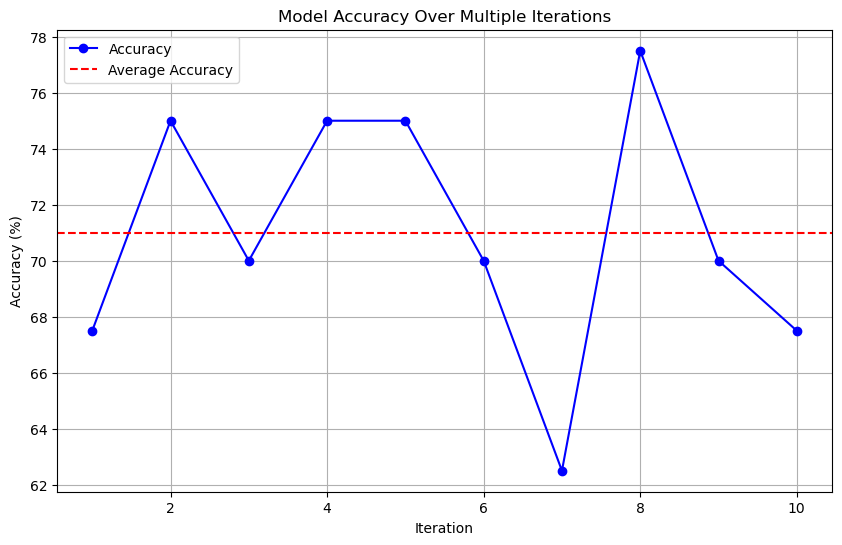

In [81]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset from CSV
data = pd.read_csv('updated_dataset.csv')

# Convert the data to a DataFrame
dataset = pd.DataFrame(data)

# Function to randomly test the model and return accuracy
def test_random_samples(model, dataset, num_samples=40):
    # Select random samples from the dataset
    random_samples = dataset.sample(n=num_samples)
    
    correct_predictions = 0

    # Iterate through the random samples
    for index, row in random_samples.iterrows():
        user_input = row['symptoms']  # The symptoms from the dataset
        true_risk = row['risk level']  # The actual risk level from the dataset
        
        # Predict the risk level using the model
        predicted_risk, _ = model.predict_risk_level(user_input)
        
        if predicted_risk == true_risk:
            correct_predictions += 1

    # Calculate accuracy
    accuracy = correct_predictions / num_samples
    return accuracy * 100

# Function to run multiple tests and plot accuracy
def plot_accuracy_over_iterations(model, dataset, iterations=10, num_samples=40):
    accuracies = []

    # Run the test multiple times to gather accuracy data
    for i in range(iterations):
        accuracy = test_random_samples(model, dataset, num_samples)
        accuracies.append(accuracy)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, iterations + 1), accuracies, marker='o', color='b', label='Accuracy')
    plt.axhline(y=sum(accuracies)/iterations, color='r', linestyle='--', label='Average Accuracy')
    plt.title('Model Accuracy Over Multiple Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Assume smoothed_df is your DataFrame for risk probabilities
    model = RiskAssessmentModel(smoothed_df)

    # Run and plot accuracy over multiple iterations
    plot_accuracy_over_iterations(model, dataset, iterations=10, num_samples=40)


In [82]:
import pickle

# Function to save the model to a file
def save_model(model, filename='risk_assessment_model.pkl'):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

# Example usage
if __name__ == "__main__":
    # Assume smoothed_df is your DataFrame for risk probabilities
    model = RiskAssessmentModel(smoothed_df)
    
    # Save the model
    save_model(model, 'risk_assessment_model.pkl')


Model saved to risk_assessment_model.pkl


In [83]:
# Function to load the model from a file
def load_model(filename='risk_assessment_model.pkl'):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    print(f"Model loaded from {filename}")
    return model

# Example usage
if __name__ == "__main__":
    # Load the saved model
    model = load_model('risk_assessment_model.pkl')

    # Test the loaded model
    user_input = "fever, cough"
    max_risk_level, max_prob = model.predict_risk_level(user_input)
    print(f"The predicted risk level is: {max_risk_level} with a probability of {max_prob}")


Model loaded from risk_assessment_model.pkl
Processed Symptoms: ['fever', 'cough']
Risk Probabilities: {'low': 2.8146137415450327e-05, 'moderate': 4.408296413850868e-05, 'high': 2.446584278293171e-05, 'varies': 2.241982581595855e-05}
The predicted risk level is: moderate with a probability of 4.408296413850868e-05
